# Unwind Platform Data Analysis: Exploratory Analysis

This notebook contains the exploratory data analysis (EDA) of the survey data collected for the Unwind platform. Building on the comprehensive univariate analysis performed in the previous notebook, we now focus on examining relationships between variables, identifying patterns, and extracting actionable insights.

## Objectives
- Investigate relationships between demographic variables and platform interest
- Analyze how entertainment consumption patterns correlate with platform adoption intention
- Identify key factors that influence user interest in the Unwind platform
- Explore feature preferences across different demographic segments
- Generate actionable insights to inform platform development priorities

`Note: All visualizations and analyses are presented in Portuguese to meet academic requirements.`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_theme(font_scale=1.2)

# For better visualization of plots in dark mode
plt.rcParams['axes.facecolor'] = '#f0f0f0'
plt.rcParams['figure.facecolor'] = '#f0f0f0'

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

## Loading the Cleaned Dataset

Loading the processed data prepared in the previous notebooks.

In [2]:
# Load the clean dataset
df = pd.read_csv('../data/processed/clean_unwind_responses.csv')

# Convert categorical columns back to category type
categorical_columns = [
    'sexo', 'estado_civil', 'escolaridade', 'regiao', 'ocupacao', 
    'sistema_operacional', 'uso_app_similar', 'opiniao_proposta',
    'usaria_app', 'indicaria_app', 'inclusao_livros', 'funcionalidades'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')

print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

Dataset loaded with 54 rows and 17 columns


,idade,sexo,estado_civil,escolaridade,regiao,ocupacao,sistema_operacional,dias_entretenimento,horas_filmes,horas_series,horas_jogos,uso_app_similar,opiniao_proposta,usaria_app,indicaria_app,inclusao_livros,funcionalidades
0,21,Masculino,Solteiro(a),Ensino superior,Capital de São Paulo,Estudante,iOS,2,0,2,4,"Sim, uso frequentemente",Muito interessante,Sim,Sim,Seria ótimo!,Aba pessoal com suas avaliações e likes;Algori...
1,17,Masculino,Solteiro(a),Ensino médio,Capital de São Paulo,Estudante,Android,5,1,1,4,"Sim, uso frequentemente",Muito interessante,Sim,Sim,Seria ótimo!,Algoritmo de recomendação futura;Feed social c...
2,20,Masculino,Solteiro(a),Ensino superior (incompleto),Região do ABCD,Estudante,iOS,7,2,3,4,"Sim, mas raramente",Muito interessante,Sim,Sim,"Seria interessante, mas não é algo essencial p...",Algoritmo de recomendação futura;Feed social c...
3,44,Feminino,Casado(a),Ensino médio (completo),Capital de São Paulo,Autônomo(a),Android,7,10,10,0,Não conheço nenhum,Interessante,Sim,Sim,Seria ótimo!,Aba pessoal com suas avaliações e likes
4,21,Feminino,Solteiro(a),Ensino superior (incompleto),Capital de São Paulo,Estudante,iOS,1,1,1,0,Não tenho interesse,Muito interessante,Não,Sim,Seria ótimo!,Algoritmo de recomendação futura


## Categorical Variables vs Platform Interest

In [3]:
def analyze_categorical_vs_interest(df, category_col, interest_col='usaria_app'):
   cross_tab = pd.crosstab(df[category_col], df[interest_col], normalize='index') * 100
   
   colors = {'Sim': 'green', 'Não': 'red', 'Talvez': 'blue'}
   title_text = category_col.replace('_', ' ').title()
   legend_text = interest_col.replace('_', ' ').title()
   
   plt.figure(figsize=(14, 8))
   cross_tab.plot(kind='bar', stacked=True, color=[colors.get(x, 'gray') for x in cross_tab.columns])
   plt.title(f'Relação entre {title_text} e Interesse na Plataforma', fontsize=14)
   plt.xlabel('')
   plt.ylabel('Percentagem (%)')
   
   plt.xticks(rotation=45, ha='right')
   
   plt.grid(axis='y', linestyle='--', alpha=0.7)
   
   plt.legend(title=legend_text, bbox_to_anchor=(1.05, 1), loc='upper left')
   
   plt.tight_layout()
   plt.subplots_adjust(bottom=0.25, right=0.85)
   
   plt.savefig(f'../images/{category_col}_vs_interest.png', dpi=300, bbox_inches='tight')
   plt.show()
   
   print(f"\nCross-tabulation of {category_col} vs {interest_col} (%):")
   print(cross_tab.round(1))
   
   print(f"\nRaw counts of {category_col} vs {interest_col}:")
   print(pd.crosstab(df[category_col], df[interest_col]))

### Gender vs Platform Interest

<Figure size 1400x800 with 0 Axes>

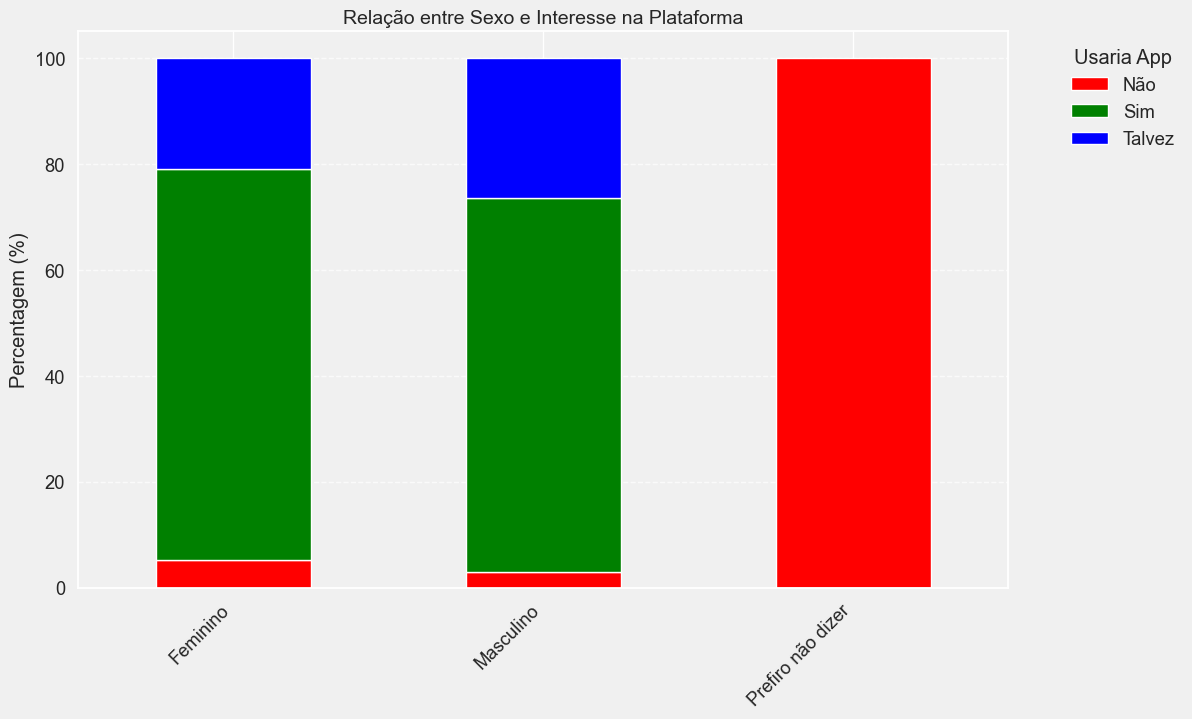


Cross-tabulation of sexo vs usaria_app (%):
usaria_app           Não   Sim  Talvez
sexo                                  
Feminino             5.3  73.7    21.1
Masculino            2.9  70.6    26.5
Prefiro não dizer  100.0   0.0     0.0

Raw counts of sexo vs usaria_app:
usaria_app         Não  Sim  Talvez
sexo                               
Feminino             1   14       4
Masculino            1   24       9
Prefiro não dizer    1    0       0


In [4]:
analyze_categorical_vs_interest(df, 'sexo')

#### Gender vs Platform Interest Analysis

The analysis of the relationship between gender and intention to use the Unwind platform reveals:

- **Female respondents** show strong positive interest:
    - 73.7% would use the platform ("Sim")
    - 21.1% might use it ("Talvez")
    - Only 5.3% (1 respondent) would not use it ("Não")

- **Male respondents** display a similar pattern of interest:
    - 70.6% would use the platform
    - 26.5% might use it
    - Only 2.9% (1 respondent) would not use it

- **Those who preferred not to disclose gender** (only 1 respondent) indicated they would not use the platform

- **Comparing genders**:
    - Female respondents have a slightly higher definite interest (73.7% vs 70.6%)
    - Male respondents have a slightly higher potential interest (26.5% vs 21.1%)
    - The differences are minimal and likely not statistically significant given the sample size

- Overall, both primary gender groups show strong interest in the Unwind platform, with over 70% of each group indicating they would use it, and over 90% of each group either definitely or potentially interested.

This analysis suggests that the Unwind platform has broad appeal across genders, with no substantial differences in adoption intention between male and female respondents.

### Marital Status vs Platform Interest

<Figure size 1400x800 with 0 Axes>

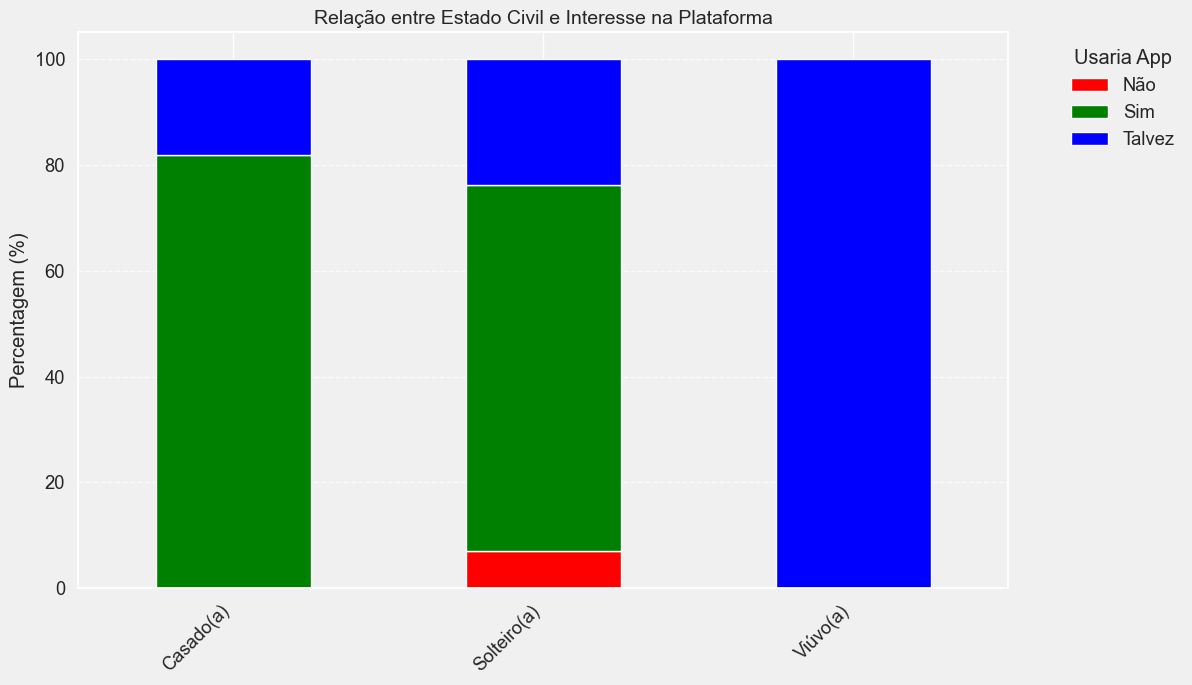


Cross-tabulation of estado_civil vs usaria_app (%):
usaria_app    Não   Sim  Talvez
estado_civil                   
Casado(a)     0.0  81.8    18.2
Solteiro(a)   7.1  69.0    23.8
Viúvo(a)      0.0   0.0   100.0

Raw counts of estado_civil vs usaria_app:
usaria_app    Não  Sim  Talvez
estado_civil                  
Casado(a)       0    9       2
Solteiro(a)     3   29      10
Viúvo(a)        0    0       1


In [5]:
analyze_categorical_vs_interest(df, 'estado_civil')

#### Marital Status vs Platform Interest Analysis
The relationship between marital status and interest in the Unwind platform reveals distinct patterns across different groups:

- Married respondents show very strong positive interest:

    - 81.8% would definitely use the platform ("Sim")
    - 18.2% might use it ("Talvez")
    - No respondents (0%) indicated they wouldn't use it ("Não")


- Single respondents, the largest group, display more diverse responses:

    - 69.0% would definitely use the platform
    - 23.8% might use it
    - 7.1% would not use it


- Widowed respondents (note: only 1 respondent) show uncertainty:

    - 100% indicated "Talvez" (might use it)
    - This single data point is insufficient for drawing broader conclusions



The data suggests married individuals show the strongest definite interest in the platform, with single respondents also showing strong but slightly more varied interest. The complete absence of negative responses from married respondents could indicate that the platform's features particularly resonate with this demographic, potentially due to shared entertainment consumption habits with partners.

These findings could inform targeted marketing approaches, with different messaging strategies for married and single potential users.

### Region vs Platform Interest

<Figure size 1400x800 with 0 Axes>

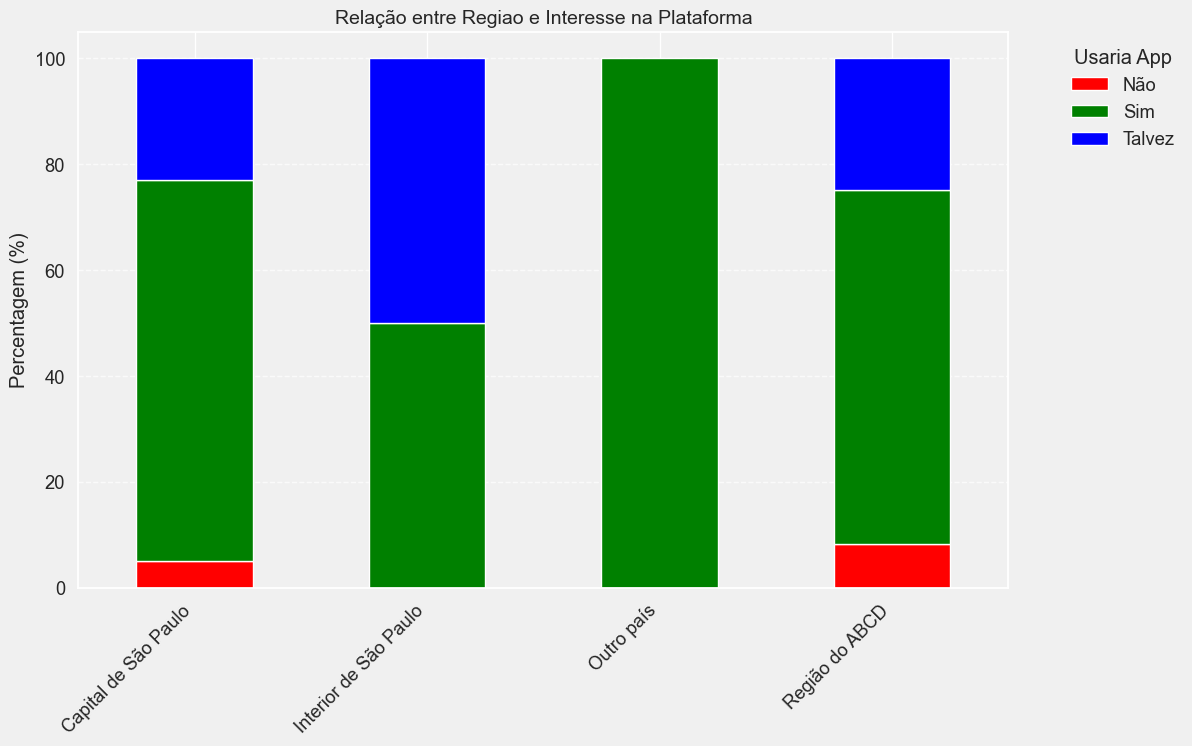


Cross-tabulation of regiao vs usaria_app (%):
usaria_app             Não    Sim  Talvez
regiao                                   
Capital de São Paulo   5.1   71.8    23.1
Interior de São Paulo  0.0   50.0    50.0
Outro país             0.0  100.0     0.0
Região do ABCD         8.3   66.7    25.0

Raw counts of regiao vs usaria_app:
usaria_app             Não  Sim  Talvez
regiao                                 
Capital de São Paulo     2   28       9
Interior de São Paulo    0    1       1
Outro país               0    1       0
Região do ABCD           1    8       3


In [6]:
analyze_categorical_vs_interest(df, 'regiao')

#### Region vs Platform Interest Analysis

The data reveals strong interest in the Unwind platform across all geographic regions:

- **São Paulo capital**: Shows high adoption potential (71.8% "Sim", 23.1% "Talvez"), with only 5.1% not interested.

- **ABCD region**: Similar pattern with slightly lower definite interest (66.7% "Sim", 25.0% "Talvez", 8.3% "Não").

- **São Paulo countryside and Other country**: Both show positive trends, though sample sizes are too small (n=2 and n=1) for reliable conclusions.

The platform appears well-received across geographic areas, with particularly strong interest in urban centers. The slight variations between Capital and ABCD regions suggest minor urban-suburban differences that could inform targeting strategies, though both areas demonstrate high overall interest.

### Education Level vs Platform Interest

<Figure size 1400x800 with 0 Axes>

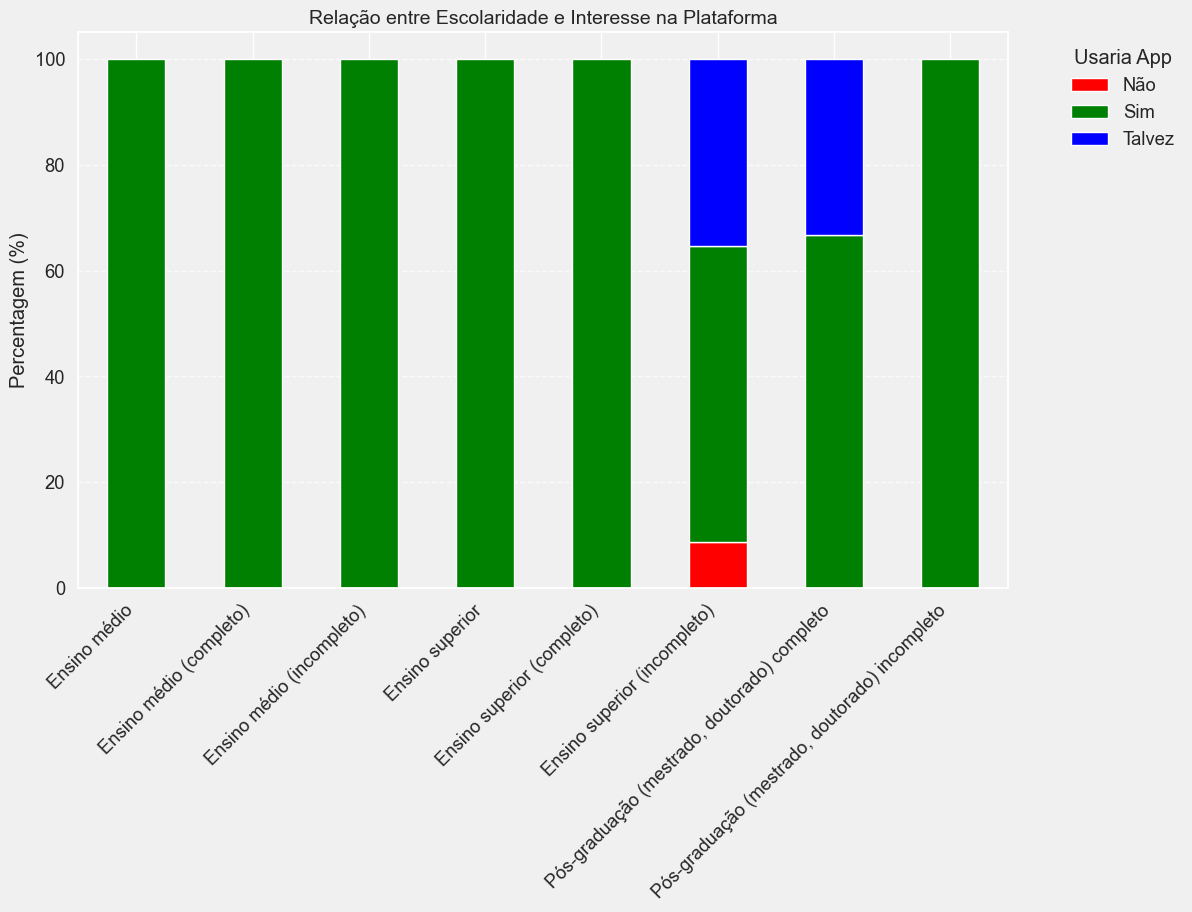


Cross-tabulation of escolaridade vs usaria_app (%):
usaria_app                                      Não    Sim  Talvez
escolaridade                                                      
Ensino médio                                    0.0  100.0     0.0
Ensino médio (completo)                         0.0  100.0     0.0
Ensino médio (incompleto)                       0.0  100.0     0.0
Ensino superior                                 0.0  100.0     0.0
Ensino superior (completo)                      0.0  100.0     0.0
Ensino superior (incompleto)                    8.8   55.9    35.3
Pós-graduação (mestrado, doutorado) completo    0.0   66.7    33.3
Pós-graduação (mestrado, doutorado) incompleto  0.0  100.0     0.0

Raw counts of escolaridade vs usaria_app:
usaria_app                                      Não  Sim  Talvez
escolaridade                                                    
Ensino médio                                      0    1       0
Ensino médio (completo)                

In [7]:
analyze_categorical_vs_interest(df, 'escolaridade')

#### Education Level vs Platform Interest Analysis

The data shows strong interest in the Unwind platform across all education levels:

- Five education categories show 100% "Sim" responses, including all high school levels, general higher education, and graduate education.

- Only two categories show mixed responses:
    - Incomplete higher education (largest group, n=34): 55.9% "Sim", 35.3% "Talvez", 8.8% "Não"
    - Complete graduate education (n=3): 66.7% "Sim", 33.3% "Talvez"

Most education categories have very small samples (n=1-7), making it difficult to draw definitive conclusions about education-based differences. The platform appears to have broad appeal across educational backgrounds, with the more diverse response pattern in the largest group likely reflecting sample size rather than true education-based differences.

### Occupation vs Platform Interest

<Figure size 1400x800 with 0 Axes>

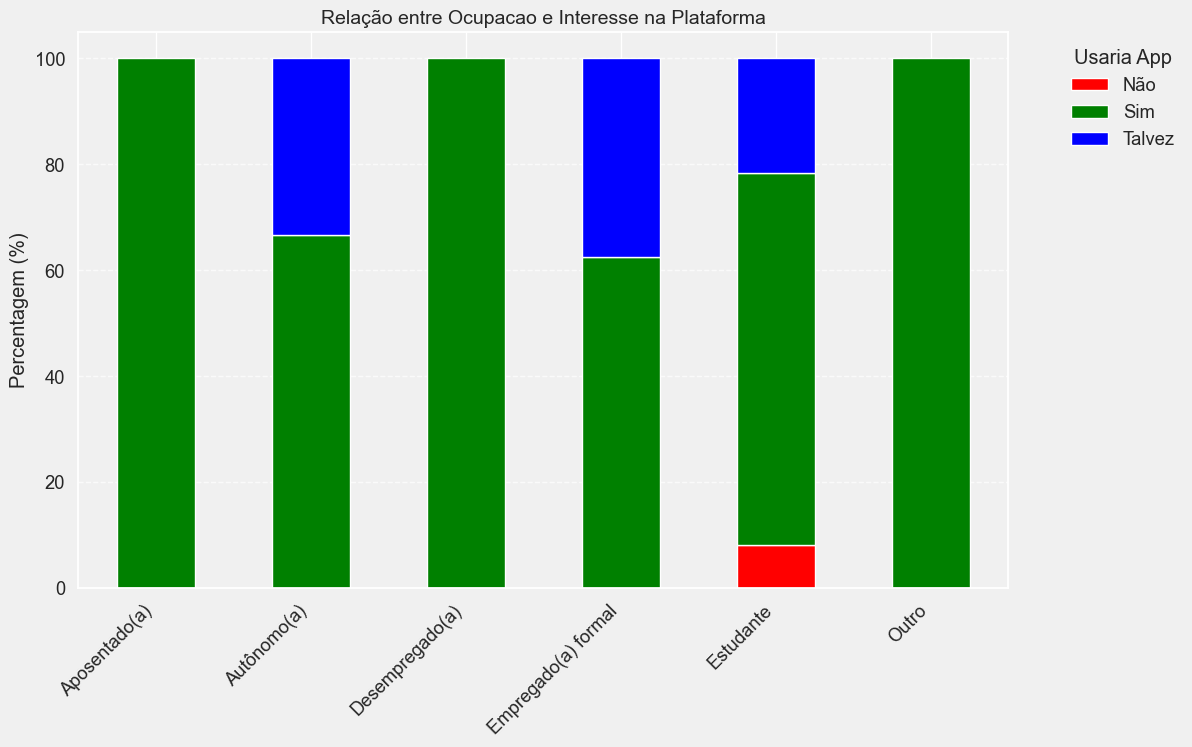


Cross-tabulation of ocupacao vs usaria_app (%):
usaria_app           Não    Sim  Talvez
ocupacao                               
Aposentado(a)        0.0  100.0     0.0
Autônomo(a)          0.0   66.7    33.3
Desempregado(a)      0.0  100.0     0.0
Empregado(a) formal  0.0   62.5    37.5
Estudante            8.1   70.3    21.6
Outro                0.0  100.0     0.0

Raw counts of ocupacao vs usaria_app:
usaria_app           Não  Sim  Talvez
ocupacao                             
Aposentado(a)          0    1       0
Autônomo(a)            0    4       2
Desempregado(a)        0    1       0
Empregado(a) formal    0    5       3
Estudante              3   26       8
Outro                  0    1       0


In [8]:
analyze_categorical_vs_interest(df, 'ocupacao')

#### Occupation vs Platform Interest Analysis

Analyzing how occupation relates to interest in the Unwind platform:

- **Students** (largest group, n=37): 70.3% "Sim", 21.6% "Talvez", and 8.1% "Não" - the only group showing any negative responses.

- **Formal employees** (n=8): 62.5% "Sim" and 37.5% "Talvez", showing slightly lower definite interest than students but still entirely positive.

- **Self-employed** (n=6): 66.7% "Sim" and 33.3% "Talvez", similar to formal employees.

- **Other occupations** (retired, unemployed, other): 100% "Sim", though each has only 1 respondent.

The data suggests strong interest across all occupational groups, with formal employees and self-employed individuals showing slightly higher uncertainty (more "Talvez" responses). Students, despite being the only group with negative responses, still show high definite interest at 70.3%.

Sample size limitations for most occupational categories make definitive occupation-based conclusions difficult.

### App Usage vs Platform Interest


<Figure size 1400x800 with 0 Axes>

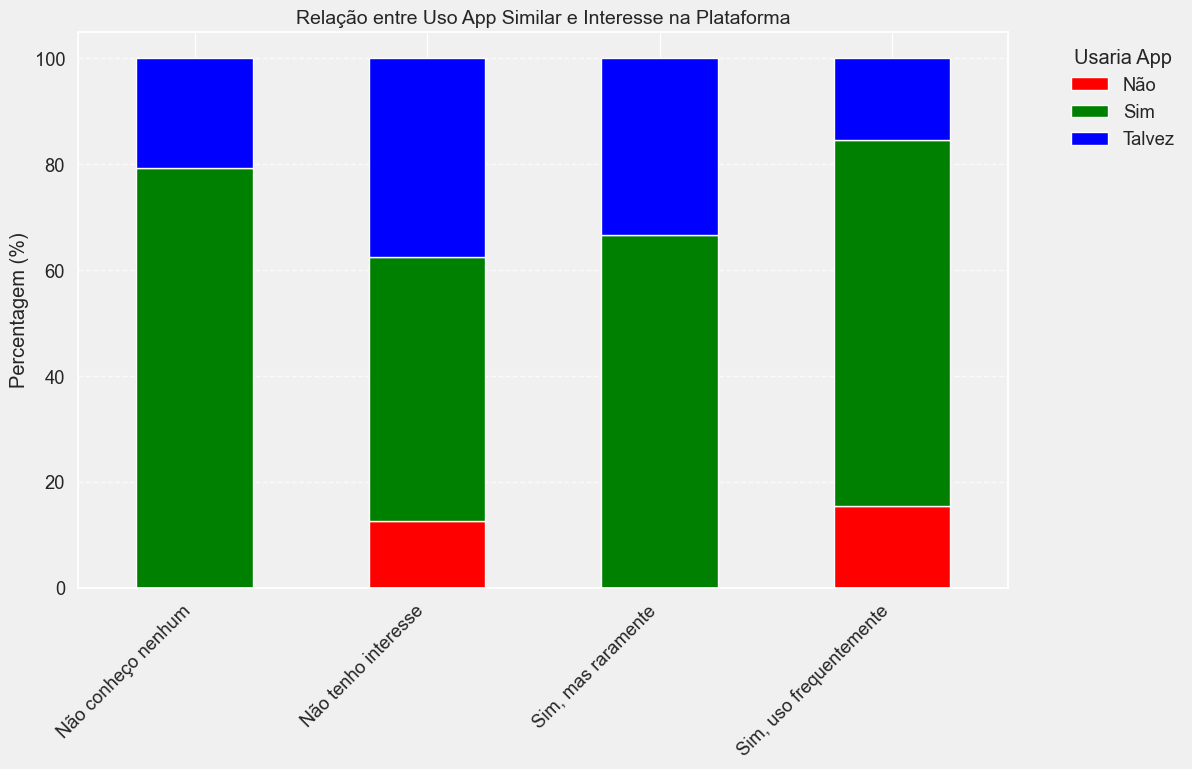


Cross-tabulation of uso_app_similar vs usaria_app (%):
usaria_app                Não   Sim  Talvez
uso_app_similar                            
Não conheço nenhum        0.0  79.2    20.8
Não tenho interesse      12.5  50.0    37.5
Sim, mas raramente        0.0  66.7    33.3
Sim, uso frequentemente  15.4  69.2    15.4

Raw counts of uso_app_similar vs usaria_app:
usaria_app               Não  Sim  Talvez
uso_app_similar                          
Não conheço nenhum         0   19       5
Não tenho interesse        1    4       3
Sim, mas raramente         0    6       3
Sim, uso frequentemente    2    9       2


In [9]:
analyze_categorical_vs_interest(df, 'uso_app_similar')

### Current App Usage vs Platform Interest Analysis

Analyzing how current usage of similar apps relates to interest in the Unwind platform:

- **Non-users of similar apps** show strong interest patterns:
    - Those who "Não conheço nenhum" (don't know any similar apps, n=24) have the highest definite interest (79.2% "Sim"), with no negative responses.
    - Those with "Não tenho interesse" (no interest in similar apps, n=8) show mixed responses: 50% would use Unwind, 37.5% might use it, and 12.5% would not.

- **Current users of similar apps** show contrasting patterns:
    - Occasional users ("Sim, mas raramente", n=9) show moderate interest (66.7% "Sim", 33.3% "Talvez") with no negative responses.
    - Frequent users ("Sim, uso frequentemente", n=13) show both strong interest (69.2% "Sim") and the highest rejection rate (15.4% "Não").

Notably, respondents who don't know similar apps are most receptive to Unwind, suggesting untapped market potential. The mixed response from frequent users of similar apps could indicate either that they see Unwind as a potential replacement for current solutions or that they're more critical due to their experience with competing platforms.

This relationship suggests that Unwind may have its strongest appeal among those not currently using similar apps, representing an opportunity to capture an underserved market segment.

## Entertainment Consumption vs Platform Interest

Examining how entertainment consumption patterns relate to interest in the platform.

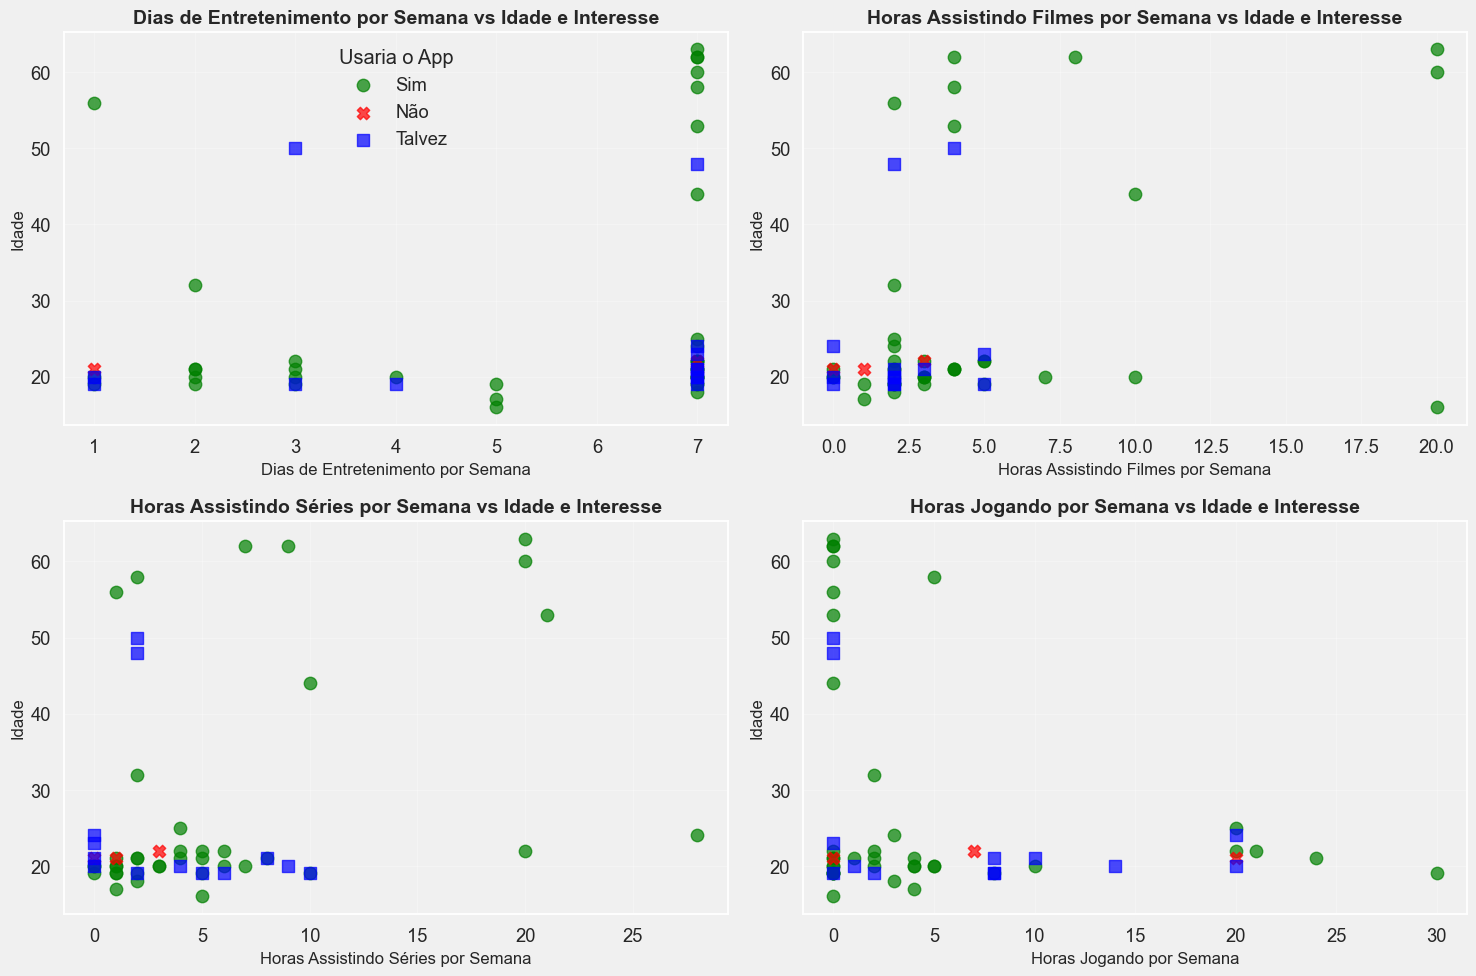

In [10]:
plt.figure(figsize=(15, 10))

entertainment_vars = ['dias_entretenimento', 'horas_filmes', 'horas_series', 'horas_jogos']
titles = ['Dias de Entretenimento por Semana', 
         'Horas Assistindo Filmes por Semana',
         'Horas Assistindo Séries por Semana',
         'Horas Jogando por Semana']

colors = {'Sim': 'green', 'Não': 'red', 'Talvez': 'blue'}
markers = {'Sim': 'o', 'Não': 'X', 'Talvez': 's'}

for i, (var, title) in enumerate(zip(entertainment_vars, titles)):
   plt.subplot(2, 2, i+1)
   for category, color in colors.items():
       subset = df[df['usaria_app'] == category]
       plt.scatter(subset[var], subset['idade'], 
                   color=color, label=category, 
                   alpha=0.7, s=80, marker=markers[category])
   
   plt.title(f'{title} vs Idade e Interesse', fontweight='bold', fontsize=14)
   plt.xlabel(title, fontsize=12)
   plt.ylabel('Idade', fontsize=12)
   plt.grid(True, alpha=0.3)
   if i == 0: 
       plt.legend(title='Usaria o App', loc='upper center')

plt.tight_layout()
plt.savefig('../images/entertainment_interest_age.png', dpi=300, bbox_inches='tight')
plt.show()

### Entertainment Consumption vs Age and Platform Interest

These scatter plots reveal interesting patterns in how entertainment consumption relates to age and platform interest:

- **Distribution of responses**: Green circles ("Sim") dominate across all consumption patterns, indicating strong interest regardless of entertainment habits.

- **Age patterns**: 
  - Most respondents are clustered in the 18-25 age range across all consumption levels
  - Older respondents (40-60+ age range) tend to have varying entertainment habits but generally show positive interest

- **Days of entertainment**:
  - Daily consumers (7 days/week) span all age groups and show mostly positive responses
  - The few negative responses ("Não") appear primarily among younger users with lower consumption days

- **Entertainment hours**:
  - Heavy consumers of all media types (high hours) predominantly show positive interest
  - The few negative responses are from younger users with low-to-moderate consumption

- **Gaming patterns**:
  - Non-gamers (0 hours) span all age ranges and show primarily positive interest
  - Higher gaming hours (15+ hours/week) appear mainly among younger respondents with positive interest

These visualizations suggest the platform has appeal across different consumption patterns and age groups, with no strong indication that entertainment consumption levels predict interest in the platform.

## Platform Features vs Interest

Examining how preference for different features relates to interest in the platform.

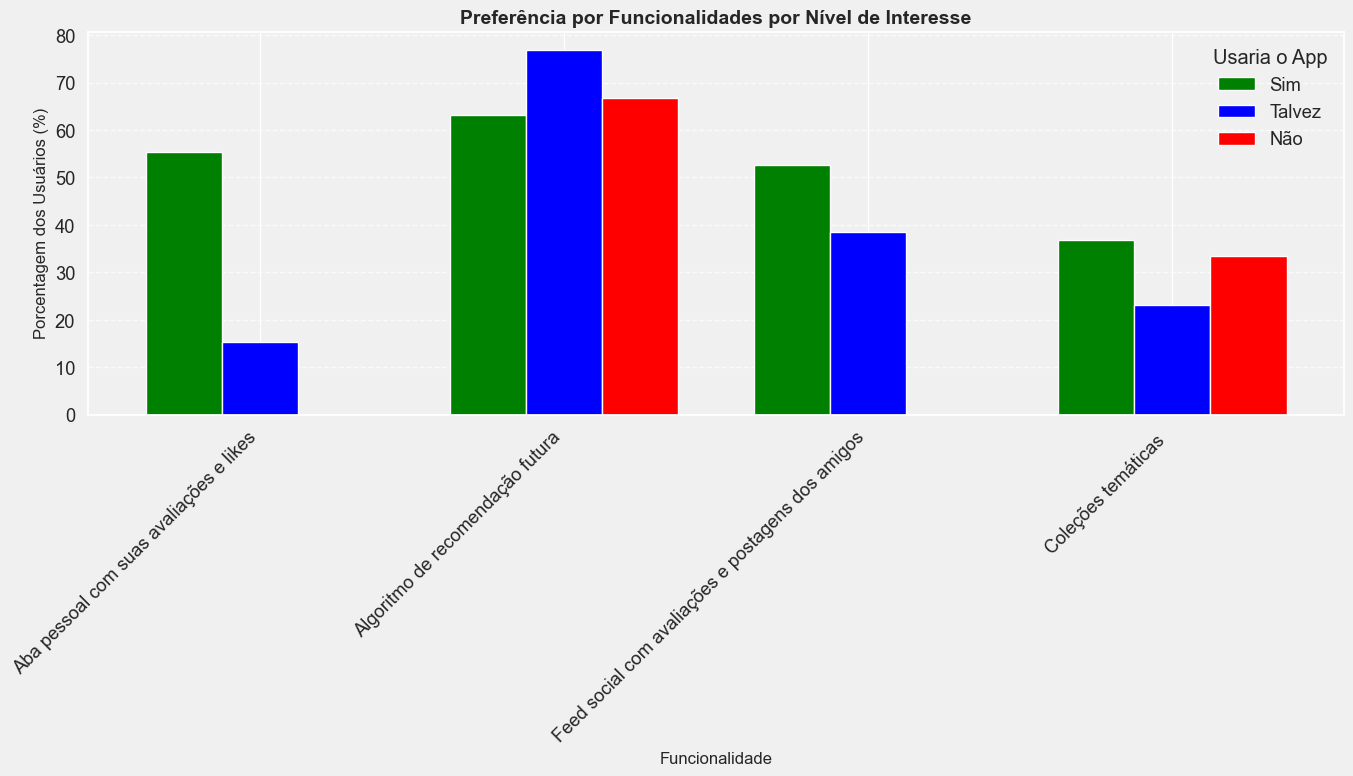

Feature preference by interest level:

Aba pessoal com suas avaliações e likes:
  Sim: 21 users (55.3%)
  Talvez: 2 users (15.4%)
  Não: 0 users (0.0%)

Algoritmo de recomendação futura:
  Sim: 24 users (63.2%)
  Talvez: 10 users (76.9%)
  Não: 2 users (66.7%)

Feed social com avaliações e postagens dos amigos:
  Sim: 20 users (52.6%)
  Talvez: 5 users (38.5%)
  Não: 0 users (0.0%)

Coleções temáticas (ex: tudo da Marvel):
  Sim: 14 users (36.8%)
  Talvez: 3 users (23.1%)
  Não: 1 users (33.3%)


In [11]:
features = ["Aba pessoal com suas avaliações e likes", 
           "Algoritmo de recomendação futura", 
           "Feed social com avaliações e postagens dos amigos", 
           "Coleções temáticas (ex: tudo da Marvel)"]

feature_interest_data = []


for feature in features:
    for interest in ['Sim', 'Talvez', 'Não']:
        interest_users = df[df['usaria_app'] == interest]
        
        feature_count = sum(interest_users['funcionalidades'].str.contains(feature, regex=False, na=False))
        
        if len(interest_users) > 0:
            percentage = (feature_count / len(interest_users)) * 100
        else:
            percentage = 0
  
        feature_interest_data.append({
            'Feature': feature,
            'Interest': interest,
            'Count': feature_count,
            'Percentage': percentage
        })

feature_df = pd.DataFrame(feature_interest_data)

plt.figure(figsize=(14, 8))
for i, interest in enumerate(['Sim', 'Talvez', 'Não']):
    subset = feature_df[feature_df['Interest'] == interest]
    plt.bar([x + i*0.25 for x in range(len(features))], 
            subset['Percentage'], 
            width=0.25, 
            label=interest,
            color=colors[interest])

plt.title('Preferência por Funcionalidades por Nível de Interesse', fontweight='bold', fontsize=14)
plt.xlabel('Funcionalidade', fontsize=12)
plt.ylabel('Porcentagem dos Usuários (%)', fontsize=12)
plt.xticks([x + 0.25 for x in range(len(features))], 
           [f.split('(')[0] for f in features], 
           rotation=45, ha='right')
plt.legend(title='Usaria o App')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('../images/feature_preference_by_interest.png', dpi=300, bbox_inches='tight')
plt.show()


print("Feature preference by interest level:")
for feature in features:
    print(f"\n{feature}:")
    for interest in ['Sim', 'Talvez', 'Não']:
        subset = feature_df[(feature_df['Feature'] == feature) & (feature_df['Interest'] == interest)]
        print(f"  {interest}: {subset['Count'].values[0]} users ({subset['Percentage'].values[0]:.1f}%)")

#### Feature Preference by Interest Level Analysis
The analysis of feature preferences across interest levels reveals key insights:

- Recommendation Algorithm: Most universally valued feature (63.2% of "Sim", 76.9% of "Talvez", and 66.7% of "Não" users), indicating it should be a development priority.
- Personal Profile: Strong driver for committed users (55.3% of "Sim") but less important for undecided users (15.4% of "Talvez").
- Social Feed: Important for engaged users (52.6% of "Sim", 38.5% of "Talvez"), with no negative interest.
Thematic Collections: Less popular overall (36.8% of "Sim", 23.1% of "Talvez"), suggesting a secondary priority for development.

The platform's appeal should be primarily driven by personalization capabilities and social features, with content organization as a supplementary benefit.